In [140]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [141]:
data = pd.read_csv(r"C:\Users\user\Documents\data sets\ODI_Match_info.csv")

In [142]:
data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,1395700,2023,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0,0,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,65634,2002/03,Sydney,2003/01/09,Sri Lanka,Australia,Australia,field,normal,0,Sri Lanka,79,0,ST Jayasuriya,Sydney Cricket Ground,RB Tiffin,SJA Taufel,DB Hair
2375,64817,2002/03,Wellington,2003/01/08,New Zealand,India,New Zealand,bat,normal,0,India,0,2,Z Khan,"Westpac Stadium, Wellington",BF Bowden,DJ Harper,DB Cowie
2376,64816,2002/03,Queenstown,2003/01/04,India,New Zealand,New Zealand,field,normal,0,New Zealand,0,7,AR Adams,"Davies Park, Queenstown",EAR de Silva,DB Cowie,AL Hill
2377,64815,2002/03,Christchurch,2003/01/01,India,New Zealand,India,bat,normal,0,New Zealand,0,5,DR Tuffey,"Jade Stadium, Christchurch",EAR de Silva,DB Cowie,AL Hill


In [143]:
data.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel


In [144]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2379 non-null   int64 
 1   season           2379 non-null   object
 2   city             2069 non-null   object
 3   date             2379 non-null   object
 4   team1            2379 non-null   object
 5   team2            2379 non-null   object
 6   toss_winner      2379 non-null   object
 7   toss_decision    2379 non-null   object
 8   result           2379 non-null   object
 9   dl_applied       2379 non-null   int64 
 10  winner           2259 non-null   object
 11  win_by_runs      2379 non-null   int64 
 12  win_by_wickets   2379 non-null   int64 
 13  player_of_match  2228 non-null   object
 14  venue            2379 non-null   object
 15  umpire1          2379 non-null   object
 16  umpire2          2379 non-null   object
 17  umpire3          2097 non-null   

In [146]:
data.isnull().sum()

id                   0
season               0
city               310
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner             120
win_by_runs          0
win_by_wickets       0
player_of_match    151
venue                0
umpire1              0
umpire2              0
umpire3            282
dtype: int64

In [147]:
data.duplicated().any()

False

In [148]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [149]:
from matplotlib import pyplot

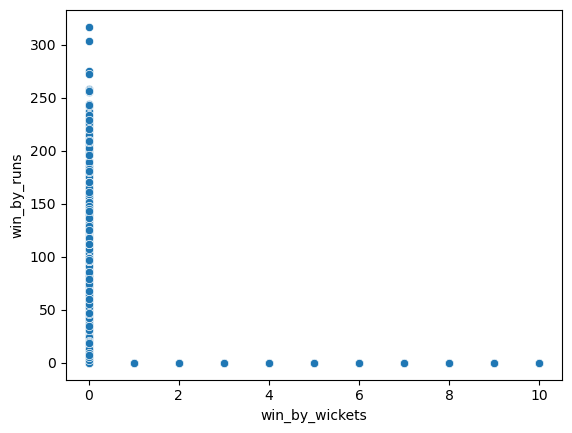

In [150]:
sn.scatterplot(x = 'win_by_wickets' , y = 'win_by_runs' , data = data)
plt.show()

In [151]:
data['win_by_wickets'].kurtosis()

-1.1287376765147328

In [152]:
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,2.379000e+03,2379.000000,2379.000000,2379.000000
mean,7.114354e+05,0.084489,34.680538,2.750736
std,4.287345e+05,0.278179,53.989592,3.238695
min,6.481400e+04,0.000000,0.000000,0.000000
25%,3.353495e+05,0.000000,0.000000,0.000000
50%,6.490950e+05,0.000000,0.000000,0.000000
75%,1.144488e+06,0.000000,58.000000,6.000000
max,1.395701e+06,1.000000,317.000000,10.000000


In [153]:
data['win_by_runs'].skew(
)

1.7524491040438188

In [154]:
data.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_16428\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,dl_applied,win_by_runs,win_by_wickets
id,1.000000,-0.007345,0.006960,-0.028621
dl_applied,-0.007345,1.000000,-0.030402,-0.017222
win_by_runs,0.006960,-0.030402,1.000000,-0.545805
win_by_wickets,-0.028621,-0.017222,-0.545805,1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_16428\2789463542.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(data.corr() , annot = True)


<Axes: >

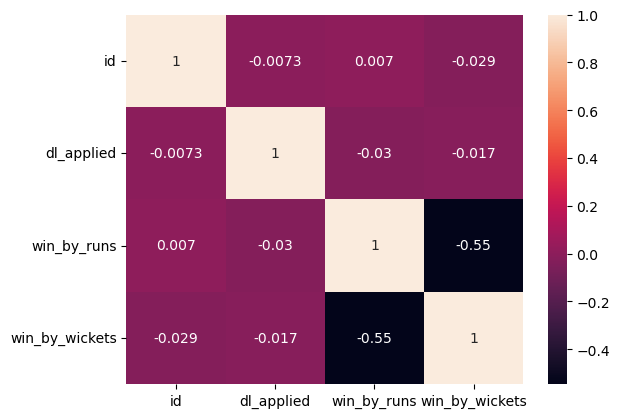

In [155]:
sn.heatmap(data.corr() , annot = True)


In [156]:
data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,1395700,2023,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0,0,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,65634,2002/03,Sydney,2003/01/09,Sri Lanka,Australia,Australia,field,normal,0,Sri Lanka,79,0,ST Jayasuriya,Sydney Cricket Ground,RB Tiffin,SJA Taufel,DB Hair
2375,64817,2002/03,Wellington,2003/01/08,New Zealand,India,New Zealand,bat,normal,0,India,0,2,Z Khan,"Westpac Stadium, Wellington",BF Bowden,DJ Harper,DB Cowie
2376,64816,2002/03,Queenstown,2003/01/04,India,New Zealand,New Zealand,field,normal,0,New Zealand,0,7,AR Adams,"Davies Park, Queenstown",EAR de Silva,DB Cowie,AL Hill
2377,64815,2002/03,Christchurch,2003/01/01,India,New Zealand,India,bat,normal,0,New Zealand,0,5,DR Tuffey,"Jade Stadium, Christchurch",EAR de Silva,DB Cowie,AL Hill


In [157]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [185]:
le = LabelEncoder()
data_encoded = data.apply(le.fit_transform)

In [186]:
data_encoded

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,2373,42,70,2012,8,2,3,1,0,1,9,99,0,544,105,68,48,71
1,2212,41,106,2011,6,10,10,1,1,0,7,48,0,622,265,44,109,102
2,2378,41,42,2011,15,3,16,0,1,0,16,86,0,232,234,84,138,93
3,2372,42,28,2010,2,9,9,1,1,0,9,0,5,419,187,79,48,62
4,2377,41,42,2009,15,3,4,1,1,0,27,0,0,642,234,101,138,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,136,0,131,4,21,2,3,1,1,0,22,79,0,548,249,115,128,38
2375,3,0,142,3,15,9,16,0,1,0,9,0,2,639,286,24,33,37
2376,2,0,118,2,8,16,16,1,1,0,16,0,7,35,66,50,30,6
2377,1,0,34,1,8,16,9,0,1,0,16,0,5,160,115,50,30,6


In [191]:
x = data_encoded.drop(['winner'] , axis =1 )
y = data_encoded['winner']

In [192]:
x

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,2373,42,70,2012,8,2,3,1,0,1,99,0,544,105,68,48,71
1,2212,41,106,2011,6,10,10,1,1,0,48,0,622,265,44,109,102
2,2378,41,42,2011,15,3,16,0,1,0,86,0,232,234,84,138,93
3,2372,42,28,2010,2,9,9,1,1,0,0,5,419,187,79,48,62
4,2377,41,42,2009,15,3,4,1,1,0,0,0,642,234,101,138,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,136,0,131,4,21,2,3,1,1,0,79,0,548,249,115,128,38
2375,3,0,142,3,15,9,16,0,1,0,0,2,639,286,24,33,37
2376,2,0,118,2,8,16,16,1,1,0,0,7,35,66,50,30,6
2377,1,0,34,1,8,16,9,0,1,0,0,5,160,115,50,30,6


In [193]:
y

0        9
1        7
2       16
3        9
4       27
        ..
2374    22
2375     9
2376    16
2377    16
2378    16
Name: winner, Length: 2379, dtype: int32

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
x_train, x_test , y_train , y_test = train_test_split(x , y , test_size = 0.30 , random_state = 42)

In [196]:
x_train.shape , x_test.shape

((1665, 17), (714, 17))

In [197]:
model_ran = RandomForestClassifier(n_estimators = 100 , max_features = 5)

In [198]:
model_ran

RandomForestClassifier(max_features=5)

In [201]:
model_ran.fit(x_train , y_train)

RandomForestClassifier(max_features=5)

In [202]:
y_pred = model_ran.predict(x_test)

In [203]:
y_pred

array([10, 16,  3, 18,  9, 22, 21,  9, 17, 23,  7,  7, 17, 16, 22,  7, 16,
       22, 22, 22,  9, 18, 20,  9,  9,  9, 16,  9,  3,  3,  3, 16,  3,  4,
       10,  9, 16, 24,  9, 16,  9,  7,  7,  3,  9,  3,  4, 27,  9, 22,  7,
        3,  2, 22,  9, 27, 18,  7,  7,  3, 21, 18, 27,  3,  9, 18,  0, 16,
       21,  3,  9, 27,  3, 21, 16, 18, 14,  0,  4, 21, 22,  4, 25,  3,  3,
        3,  7,  9,  9, 20,  3,  7,  7, 21, 10, 20,  3,  4,  7, 21, 22, 18,
       25,  9, 13,  7,  4,  3,  7,  9, 18, 10,  3, 21, 17,  9,  3,  3,  9,
        9,  9, 18, 20,  7,  3,  3,  9,  6, 22,  9,  9, 22,  7, 25,  3, 21,
       21,  3,  7,  4, 10,  4,  9, 22, 16, 14,  7,  4,  7, 22, 27,  7,  4,
       18, 21,  9,  3, 25, 18, 16, 22, 18, 27,  3,  3, 16,  3, 16, 18,  3,
        4,  9, 20, 13, 13, 16, 18, 26,  9, 22, 21,  4, 25,  0, 21,  3,  9,
       24, 22, 22,  3, 21,  3, 18, 16, 16, 16,  9, 16, 26, 18,  7,  7, 10,
        9, 23,  7,  9,  9, 14, 20, 21, 21, 16,  7,  9, 18,  3,  7, 13, 10,
       16,  4,  9, 18,  3

In [204]:
prediction_com = pd.DataFrame({'Actual': y_test , 'Prediction': y_pred})

In [205]:
prediction_com

,Actual,Prediction
1133,22,10
700,16,16
1025,4,3
1995,18,18
1356,9,9
...,...,...
2250,21,21
305,21,9
209,26,4
840,9,16


In [206]:
accuracy_result = accuracy_score(y_test , y_pred)

In [207]:
accuracy_result

0.6666666666666666

In [209]:
classification_result = classification_report(y_test , y_pred)

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [211]:
print(classification_result)

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           2       1.00      1.00      1.00         2
           3       0.69      0.96      0.80        77
           4       0.77      0.77      0.77        43
           6       1.00      0.25      0.40         4
           7       0.62      0.72      0.67        61
           8       0.00      0.00      0.00         1
           9       0.75      0.79      0.77        97
          10       0.39      0.50      0.44        14
          12       0.67      1.00      0.80         2
          13       0.56      0.71      0.63         7
          14       0.62      0.36      0.45        14
          15       0.00      0.00      0.00         7
          16       0.66      0.69      0.67        51
          17       0.30      0.43      0.35         7
          18       0.63      0.64      0.63        58
          19       0.00      0.00      0.00         5
          20       0.48    

In [213]:
mse = np.mean((y_test-y_pred)**2)

In [214]:
mse

44.54481792717087

In [215]:
rmse = np.sqrt(mse)

In [216]:
rmse

6.674190432342403

In [219]:
from sklearn.linear_model import Ridge ,Lasso

In [220]:
model_ridge = Ridge(alpha = 1)

In [221]:
model_ridge.fit(x_train , y_train)

Ridge(alpha=1)

In [223]:
y_pred_ridge = model_ridge.predict(x_test)

In [224]:
y_pred_ridge

array([15.47742719, 19.67301631,  3.88655884, 20.01380915, 15.7065062 ,
       12.497455  , 21.48283808, 12.86497157, 21.27336089, 14.56870484,
        4.81661642,  4.31262117, 21.46985198, 11.39675976, 12.74518107,
       16.84424145, 17.058622  , 11.89234798, 21.7363705 , 11.93817219,
       16.8806902 , 21.21346656, 12.44938037, 16.0324057 , 16.03456061,
       15.95137719, 17.01690253, 13.82617528, 10.95471575, 13.68247854,
        9.09406847, 13.59981621,  8.25684305, 10.00581919, 15.39053165,
       12.79049182,  8.97131895, 20.36651633, 12.18794477, 16.24719259,
       13.35293215,  4.98155913, 12.33066739,  5.63126569, 18.25456368,
        8.17176347,  6.75708404,  9.8146139 , 17.06914196, 24.6289286 ,
       13.97041277,  4.94281625,  5.0039675 , 16.92264379, 15.43745816,
        6.83066478, 20.87439516, 12.25874058, 14.21961275, 12.20643995,
       14.36155327, 20.57664886, 14.17528446, 11.5884408 ,  9.47345496,
       20.55508641, 13.27295582, 12.89993607, 14.02136868,  7.67

In [225]:
mse = np.mean((y_pred_ridge - y_test)**2)

In [226]:
mse

39.99351517066063

In [227]:
rmse = np.sqrt(mse)

In [228]:
rmse

6.324042628782686

In [251]:
model_lasso = Lasso(alpha = 0.5)

In [252]:
lasso = model_lasso.fit(x_train , y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.139e+01, tolerance: 1.124e+01
  model = cd_fast.enet_coordinate_descent(


In [253]:
lasso

Lasso(alpha=0.5)

In [254]:
lasso_predict = lasso.predict(x_test)

In [255]:
lasso_predict

array([15.15691107, 19.27620708,  3.95028318, 20.07310663, 15.53431707,
       12.2328941 , 21.22304638, 12.98670905, 20.99254236, 14.36656421,
        5.21835615,  4.40082002, 20.86200759, 11.55525261, 12.56328567,
       16.3701245 , 17.4924539 , 13.63494387, 21.62111571, 12.1048846 ,
       16.4966244 , 20.8954108 , 13.97705409, 16.1692215 , 15.53782807,
       15.81829708, 16.35876637, 14.16576601, 11.23000048, 13.72860693,
        9.05124896, 13.68884894,  8.68141368, 12.01239585, 15.03325149,
       12.8607275 ,  8.76353954, 21.14074832, 13.69938407, 16.17787446,
       13.50921519,  5.32247636, 12.4224166 ,  5.69055358, 18.03686566,
        8.60383134,  8.23604909,  9.56947851, 17.00818208, 24.00167757,
       14.25562325,  5.76943839,  5.02351383, 18.67487594, 14.56392575,
        7.16891026, 20.55100466, 12.03379377, 15.46548087, 12.20989533,
       14.30923987, 19.99639396, 13.89481549, 11.38019834,  9.45169181,
       20.15795426, 13.52737779, 12.89838143, 14.17309328,  7.25

In [256]:
mse = np.mean((lasso_predict - y_test)**2)

In [257]:
mse

39.86214405384293

In [258]:
rmse = np.sqrt(mse)

In [259]:
rmse

6.3136474445318

In [260]:
lasso_prediction = pd.DataFrame({'actual': y_test , 'predict': lasso_predict })

In [261]:
lasso_prediction

,actual,predict
1133,22,15.156911
700,16,19.276207
1025,4,3.950283
1995,18,20.073107
1356,9,15.534317
...,...,...
2250,21,19.966491
305,21,14.380697
209,26,15.539955
840,9,11.990368


In [262]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [270]:
df = pd.DataFrame({'team_name': data['winner'] , 'team_code': data_encoded['winner']})

In [271]:
df

,team_name,team_code
0,India,9
1,England,7
2,New Zealand,16
3,India,9
4,NaN,27
...,...,...
2374,Sri Lanka,22
2375,India,9
2376,New Zealand,16
2377,New Zealand,16


In [272]:
prediction = pd.DataFrame({'y_pred': y_pred_ridge  , 'actual': y_test})

In [273]:
prediction

,y_pred,actual
1133,15.477427,22
700,19.673016,16
1025,3.886559,4
1995,20.013809,18
1356,15.706506,9
...,...,...
2250,20.006234,21
305,13.688943,21
209,15.398250,26
840,11.956426,9
